# Healthcare Analytics
### The goal of this project is to accurately predict the Length of Stay for each patient so that the hospitals can optimize resources and function better.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings('ignore')

In [67]:
# Importing datasets
train = pd.read_csv('/content/train.csv')
test = pd.read_csv("/content/test.csv")

## Data Exploration

### Overview of Data

In [68]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [69]:
train.info()
train.Stay.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [70]:
# NA values in train dataset
train.isnull().sum().sort_values(ascending = False)

City_Code_Patient                    4532
Bed Grade                             113
Hospital_code                           0
Admission_Deposit                       0
Age                                     0
Visitors with Patient                   0
Severity of Illness                     0
Type of Admission                       0
patientid                               0
case_id                                 0
Ward_Facility_Code                      0
Ward_Type                               0
Department                              0
Available Extra Rooms in Hospital       0
Hospital_region_code                    0
City_Code_Hospital                      0
Hospital_type_code                      0
Stay                                    0
dtype: int64

In [71]:
# NA values in test dataset
test.isnull().sum().sort_values(ascending = False)

City_Code_Patient                    2157
Bed Grade                              35
case_id                                 0
Age                                     0
Visitors with Patient                   0
Severity of Illness                     0
Type of Admission                       0
patientid                               0
Ward_Facility_Code                      0
Hospital_code                           0
Ward_Type                               0
Department                              0
Available Extra Rooms in Hospital       0
Hospital_region_code                    0
City_Code_Hospital                      0
Hospital_type_code                      0
Admission_Deposit                       0
dtype: int64

In [72]:
# Dimension of train dataset
train.shape

(318438, 18)

In [73]:
# Dimension of test dataset
test.shape

(137057, 17)

In [74]:
# Number of distinct observations in train dataset
for i in train.columns:
    print(i, ':', train[i].nunique())

case_id : 318438
Hospital_code : 32
Hospital_type_code : 7
City_Code_Hospital : 11
Hospital_region_code : 3
Available Extra Rooms in Hospital : 18
Department : 5
Ward_Type : 6
Ward_Facility_Code : 6
Bed Grade : 4
patientid : 92017
City_Code_Patient : 37
Type of Admission : 3
Severity of Illness : 3
Visitors with Patient : 28
Age : 10
Admission_Deposit : 7300
Stay : 11


In [75]:
# Number of distinct observations in test dataset
for i in test.columns:
    print(i, ':', test[i].nunique())

case_id : 137057
Hospital_code : 32
Hospital_type_code : 7
City_Code_Hospital : 11
Hospital_region_code : 3
Available Extra Rooms in Hospital : 15
Department : 5
Ward_Type : 6
Ward_Facility_Code : 6
Bed Grade : 4
patientid : 39607
City_Code_Patient : 37
Type of Admission : 3
Severity of Illness : 3
Visitors with Patient : 27
Age : 10
Admission_Deposit : 6609


### Data Preparation

In [76]:
#Replacing NA values in Bed Grade Column for both Train and Test datssets
train['Bed Grade'].fillna(train['Bed Grade'].mode()[0], inplace = True)
test['Bed Grade'].fillna(test['Bed Grade'].mode()[0], inplace = True)

In [77]:
#Replacing NA values in  Column for both Train and Test datssets
train['City_Code_Patient'].fillna(train['City_Code_Patient'].mode()[0], inplace = True)
test['City_Code_Patient'].fillna(test['City_Code_Patient'].mode()[0], inplace = True)

In [78]:
# Label Encoding Stay column in train dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Stay'] = le.fit_transform(train['Stay'].astype('str'))

In [79]:
train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,4
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,3
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,4
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,4


In [80]:
#Imputing dummy Stay column in test datset to concatenate with train dataset
test['Stay'] = -1
df = pd.concat([train, test])
df.shape

(455495, 18)

In [81]:
#Label Encoding all the columns in Train and test datasets
for i in ['Hospital_type_code', 'Hospital_region_code', 'Department',
          'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age']:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i].astype(str))

In [82]:
#Spearating Train and Test Datasets
train = df[df['Stay']!=-1]
test = df[df['Stay']==-1]

### Feature Engineering

In [83]:
def get_countid_enocde(train, test, cols, name):
  temp = train.groupby(cols)['case_id'].count().reset_index().rename(columns = {'case_id': name})
  temp2 = test.groupby(cols)['case_id'].count().reset_index().rename(columns = {'case_id': name})
  train = pd.merge(train, temp, how='left', on= cols)
  test = pd.merge(test,temp2, how='left', on= cols)
  train[name] = train[name].astype('float')
  test[name] = test[name].astype('float')
  train[name].fillna(np.median(temp[name]), inplace = True)
  test[name].fillna(np.median(temp2[name]), inplace = True)
  return train, test

In [84]:
train, test = get_countid_enocde(train, test, ['patientid'], name = 'count_id_patient')
train, test = get_countid_enocde(train, test,
                                 ['patientid', 'Hospital_region_code'], name = 'count_id_patient_hospitalCode')
train, test = get_countid_enocde(train, test,
                                 ['patientid', 'Ward_Facility_Code'], name = 'count_id_patient_wardfacilityCode')

In [85]:
# Droping duplicate columns
test1 = test.drop(['Stay', 'patientid', 'Hospital_region_code', 'Ward_Facility_Code'], axis =1)
train1 = train.drop(['case_id', 'patientid', 'Hospital_region_code', 'Ward_Facility_Code'], axis =1)

In [86]:
# Splitting train data for Naive Bayes and XGBoost
X1 = train1.drop('Stay', axis =1)
y1 = train1['Stay']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size =0.20, random_state =100)

## Models

### Naive Bayes Model

In [87]:
from sklearn.naive_bayes import GaussianNB
target = y_train.values
features = X_train.values
classifier_nb = GaussianNB()
model_nb = classifier_nb.fit(features, target)

In [88]:
prediction_nb = model_nb.predict(X_test)
from sklearn.metrics import accuracy_score
acc_score_nb = accuracy_score(prediction_nb,y_test)
print("Acurracy:", acc_score_nb*100)

Acurracy: 34.55439015199096


### XGBoost Model

In [89]:
import xgboost
classifier_xgb = xgboost.XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=800,
                                  objective='multi:softmax', reg_alpha=0.5, reg_lambda=1.5,
                                  booster='gbtree', n_jobs=4, min_child_weight=2, base_score= 0.75)

In [90]:
model_xgb = classifier_xgb.fit(X_train, y_train)

In [91]:
prediction_xgb = model_xgb.predict(X_test)
acc_score_xgb = accuracy_score(prediction_xgb,y_test)
print("Accuracy:", acc_score_xgb*100)

Accuracy: 43.030084160281376


# Predictions

In [92]:
# Naive Bayes
pred_nb = classifier_nb.predict(test1.iloc[:,1:])
result_nb = pd.DataFrame(pred_nb, columns=['Stay'])
result_nb['case_id'] = test1['case_id']
result_nb = result_nb[['case_id', 'Stay']]

In [93]:
result_nb['Stay'] = result_nb['Stay'].replace({0:'0-10', 1: '11-20', 2: '21-30', 3:'31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100', 10: 'More than 100 Days'})
result_nb.head()

,case_id,Stay
0,318439,21-30
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,31-40


In [94]:
# XGBoost
pred_xgb = classifier_xgb.predict(test1.iloc[:,1:])
result_xgb = pd.DataFrame(pred_xgb, columns=['Stay'])
result_xgb['case_id'] = test1['case_id']
result_xgb = result_xgb[['case_id', 'Stay']]

In [95]:
result_xgb['Stay'] = result_xgb['Stay'].replace({0:'0-10', 1: '11-20', 2: '21-30', 3:'31-40', 4: '41-50', 5: '51-60', 6: '61-70', 7: '71-80', 8: '81-90', 9: '91-100', 10: 'More than 100 Days'})
result_xgb.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


## Results

In [96]:
# Naive Bayes
print(result_nb.groupby('Stay')['case_id'].nunique())

Stay
0-10                   2598
11-20                 26827
21-30                 72206
31-40                 15639
41-50                   469
51-60                 13651
61-70                    92
71-80                   955
81-90                   296
91-100                    2
More than 100 Days     4322
Name: case_id, dtype: int64


In [98]:
# XGBoost
print(result_xgb.groupby('Stay')['case_id'].nunique())

Stay
0-10                   4462
11-20                 39080
21-30                 58320
31-40                 12554
41-50                    60
51-60                 18900
61-70                    12
71-80                   297
81-90                  1112
91-100                   70
More than 100 Days     2190
Name: case_id, dtype: int64


## Data Visualization.

# 1) Types of Hospital :

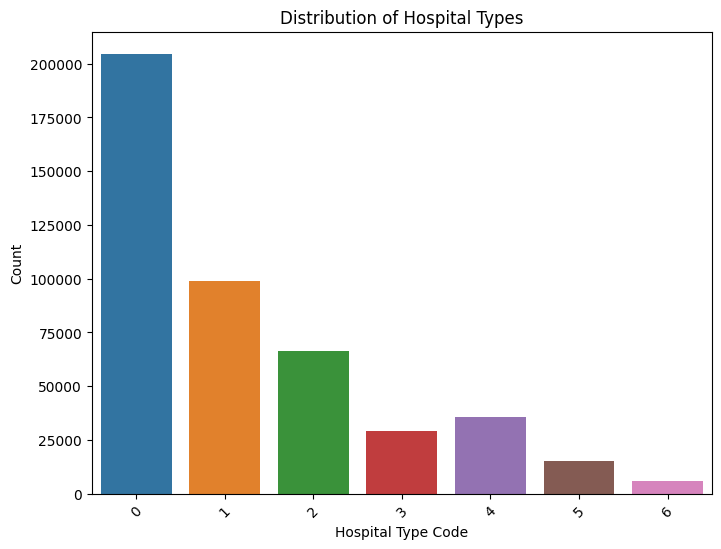

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Hospital_type_code')
plt.xlabel('Hospital Type Code')
plt.ylabel('Count')
plt.title('Distribution of Hospital Types')
plt.xticks(rotation=45)
plt.show()


# Pie Chart - Admission Type Distribution:


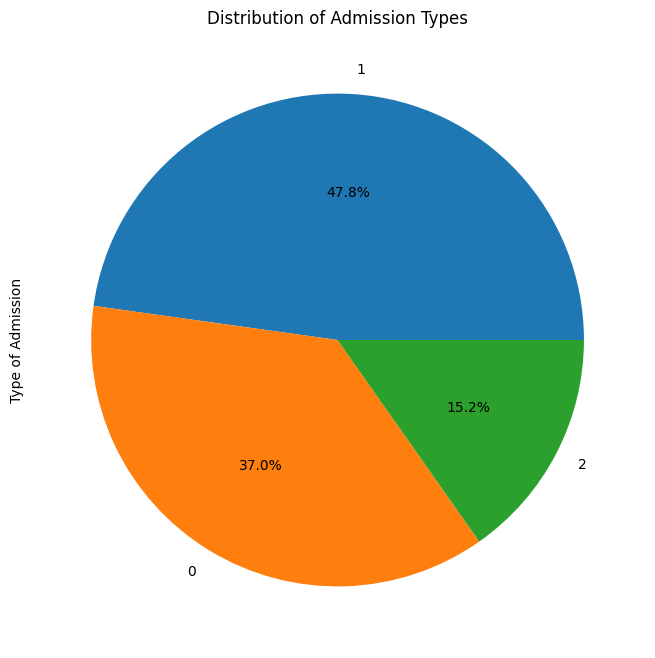

In [100]:
plt.figure(figsize=(8, 8))
df['Type of Admission'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Admission Types')
plt.show()


# 3) Box Plot - Admission Deposit by Stay Duration:



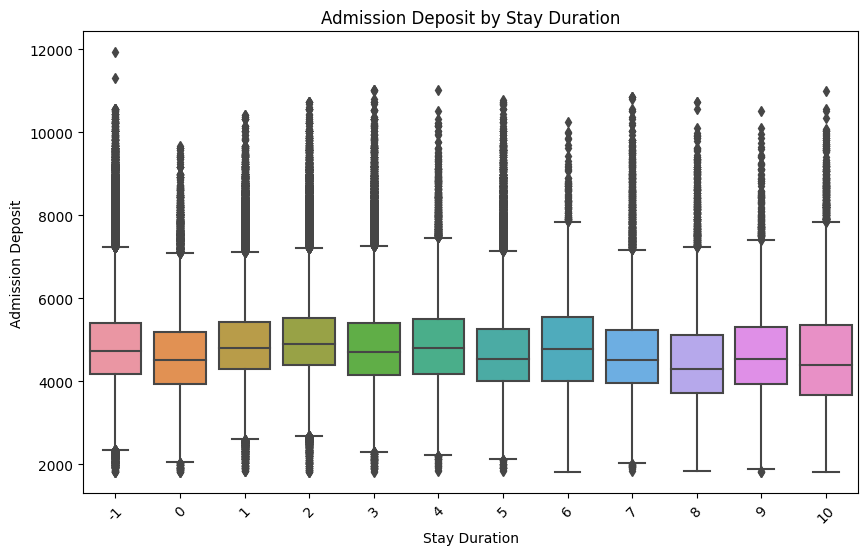

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Stay', y='Admission_Deposit')
plt.xlabel('Stay Duration')
plt.ylabel('Admission Deposit')
plt.title('Admission Deposit by Stay Duration')
plt.xticks(rotation=45)
plt.show()


# 4) Scatter Plot - Age vs. Visitors with Patient:


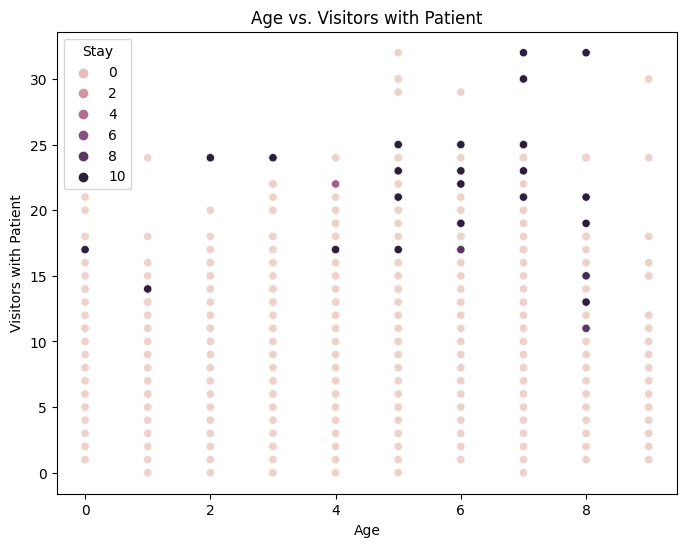

In [102]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Visitors with Patient', hue='Stay')
plt.xlabel('Age')
plt.ylabel('Visitors with Patient')
plt.title('Age vs. Visitors with Patient')
plt.legend(title='Stay')
plt.show()
